In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("Logistic_Iris.csv")
df.head()

,Sepal Length,Sepal Width,Petal Length,Peatal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
x=df.iloc[:,[0,1,2,3]].values
y=df.iloc[:,4].values

In [34]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,random_state=0)
sc=StandardScaler()
xtr=sc.fit_transform(xtr)
xts=sc.transform(xts)


In [35]:
lr=LogisticRegression(random_state=0)
lr.fit(xtr,ytr)

y_pred=lr.predict(xts)

In [36]:
acc_lr=accuracy_score(yts,y_pred)
print(acc_lr)

0.9736842105263158


In [16]:
lr.score(xts,yts)

0.9736842105263158

In [37]:
cm=confusion_matrix(yts,y_pred)
print("The confusion Matrix\n\n",cm)

The confusion Matrix

 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


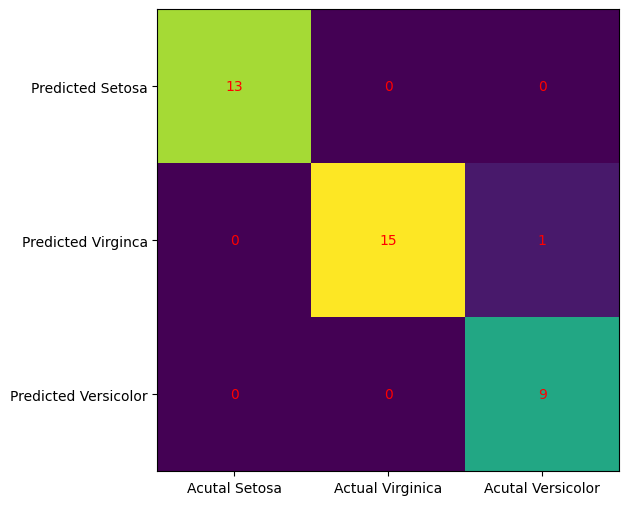

In [38]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2),ticklabels=("Acutal Setosa",'Actual Virginica','Acutal Versicolor'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=("Predicted Setosa","Predicted Virginca","Predicted Versicolor"))
ax.set_ylim(2.5,-0.5)
for i in range(3):
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()